In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from collections import deque
from tqdm import tqdm
import pandas as pd
import copy

In [3]:
P_0_matrix=np.array([[0.5,0,0,0.5],
                   [0.5,0.5,0,0],
                   [0,0.5,0.5,0],
                   [0,0,0.5,0.5]])


In [4]:
P_1_matrix=P_0_matrix.transpose()

In [5]:
P_1_matrix

array([[0.5, 0.5, 0. , 0. ],
       [0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0.5, 0.5],
       [0.5, 0. , 0. , 0.5]])

In [6]:
action_space=[0,1]
state_space=[0,1,2,3]
reward_matrix=[-1,0,0,1]

In [7]:
def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  new_state=state
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state]
  return [new_state,reward]

In [8]:
N=10
M=5
epsilon=0.1
subsidy=0
arm_indexes=[i for i in range(N)]
gamma=0.99

In [9]:
Q_values=[[0,-0.5],[0,0.5],[0,-1],[0,1]]
Q_values

[[0, -0.5], [0, 0.5], [0, -1], [0, 1]]

In [10]:
def act(Q_values,epsilon,state):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[state])
  return action



In [11]:
current_state=[0 for _ in range(N)]

In [12]:
alt_indexes_overtime=[]

In [13]:
def Q_value_update(Q_values,state,next_state,action,reward,subsidy,alpha):
  if action==1:
    Q_values[state][action]=(1-alpha)*(Q_values[state][action])+alpha*(reward+max(Q_values[next_state])-(Q_values[2][0]))
  else:
    Q_values[state][action]=(1-alpha)*(Q_values[state][action])+alpha*(reward+subsidy+max(Q_values[next_state])-(Q_values[2][0]))




In [14]:
rewards=[]
subsidies=[]
action_sums=[]
betas=[]
alphas=[]

In [15]:
for i in range(1,100001):
    temp=[]
    for x in Q_values:
        temp.append(x[1]-x[0])
    alt_indexes_overtime.append(temp)
    # top_M_indices=act(alternative_indexes,N,M,epsilon)
    action_sum=0
    reward_sum=0
    alpha=1/(1+(i/500))
    beta=1/(1+(i*np.log(i)/500))
    for index in arm_indexes:
        # action=np.argmax(Q_values[index][current_state[index]])
        action=act(Q_values,epsilon,current_state[index])
        action_sum+=action

        x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
        new_state=x[0]
        reward=x[1]
        # if current_state[index]==0:
        #     print(Q_values)
        Q_value_update(Q_values,current_state[index],new_state,action,reward,subsidy,alpha)
        # if current_state[index]==0:
        #     print(Q_values)
        current_state[index]=new_state
        reward_sum+=reward
    subsidy+=beta*(action_sum-M)
    subsidies.append(subsidy)
    #   epsilon=epsilon*gamma
    #   if epsilon<=0.01:
    #     epsilon=0.01
    rewards.append(reward_sum)
    action_sums.append(action_sum)
    betas.append(beta)
    alphas.append(alpha)








In [16]:
epsilon

0.1

In [17]:
plt.figure(figsize=(10,6))
x1=[x[0] for x in alt_indexes_overtime]
x2=[x[1] for x in alt_indexes_overtime]
x3=[x[2] for x in alt_indexes_overtime]
x4=[x[3] for x in alt_indexes_overtime]





<Figure size 1000x600 with 0 Axes>

(-2.0, 2.0)

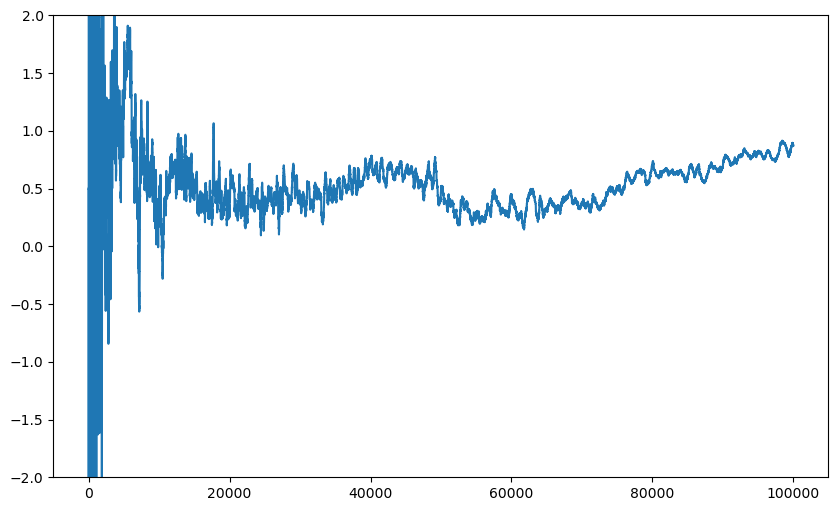

In [18]:
plt.figure(figsize=(10,6))

plt.plot(x2)
plt.ylim([-2,2])


In [19]:
x1[-1]

-1.0357226681117286

Text(0.5, 1.0, 'Subsidy vs Steps for Circulant Dynamics Example')

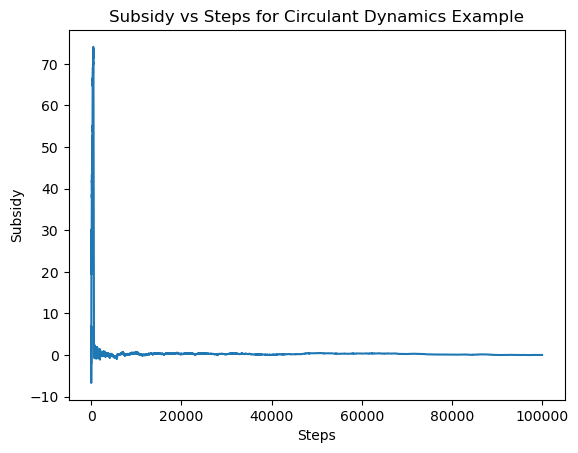

In [20]:
plt.plot(subsidies)
plt.xlabel('Steps')
plt.ylabel('Subsidy')
plt.title('Subsidy vs Steps for Circulant Dynamics Example')


In [21]:
df=pd.DataFrame(rewards)


Text(0.5, 1.0, ' Moving Average of reward for Circulant Dynamics Example ')

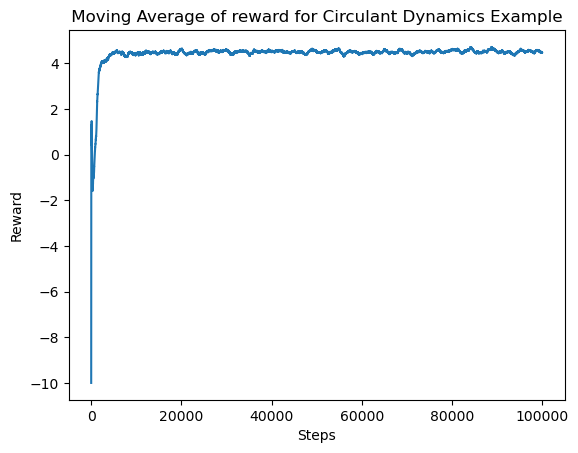

In [22]:
plt.plot(df[0].rolling(1000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(' Moving Average of reward for Circulant Dynamics Example ')


In [23]:
Q_values

[[-0.4670382938291357, -1.5027609619408644],
 [-0.33433507817625735, 0.53920902602354],
 [0.5586441682713467, 1.6608212134545388],
 [2.643533578116816, 1.5324523300271398]]

In [24]:
for x in Q_values:
    print(x[1]-x[0])

-1.0357226681117286
0.8735441041997973
1.102177045183192
-1.1110812480896761


Text(0.5, 1.0, 'Moving Average of number of arms activated for Circulant Dynamics Example ')

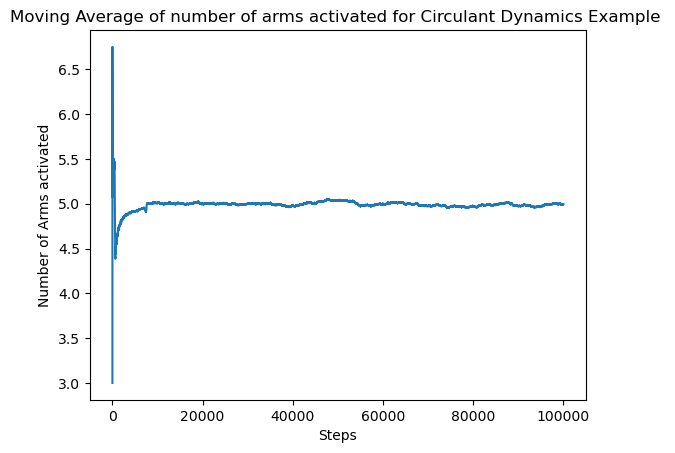

In [25]:
df['action_sums']=action_sums
plt.plot(df['action_sums'].rolling(7000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Number of Arms activated')
plt.title('Moving Average of number of arms activated for Circulant Dynamics Example ')


In [26]:
current_state_init=[]
for i in range(N):
    if i<N/6:
        current_state_init.append(0)
    elif i>=N/6 and i<N/2:
        current_state_init.append(1)
    else:
        current_state_init.append(2)

In [27]:
#using learnt indices
# current_state=[0 for _ in range(N)]
current_state=copy.deepcopy(current_state_init)
reward_sums_alt_index=[]
alternative_indexes=[0 for _ in range(N)]
for i in range(1,10001):
  reward_sum_alt_index=0
  for index in arm_indexes:
    alternative_indexes[index]=Q_values[current_state[index]][1]-Q_values[current_state[index]][0]
  indices_to_pull = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-M:]
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
  reward_sums_alt_index.append(reward_sum_alt_index)


In [28]:
whittle_index_arms=[0 for _ in range(N)]
current_state=copy.deepcopy(current_state_init)
reward_sums_whittle_index=[]
actual_whittle_indexes=[-0.5,0.5,1,-1]

for i in range(1,10001):
  reward_sum_whittle_index=0
  for index in arm_indexes:
    whittle_index_arms[index]=actual_whittle_indexes[current_state[index]]
  #print(whittle_index_arms)
  indices_to_pull = sorted(range(len(whittle_index_arms)), key = lambda j: whittle_index_arms[j])[-M:]
  # print(indices_to_pull)
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_whittle_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_whittle_index+=reward
  reward_sums_whittle_index.append(reward_sum_whittle_index)

Text(0.5, 1.0, 'Moving Average of reward for Circulant Dynamics Example')

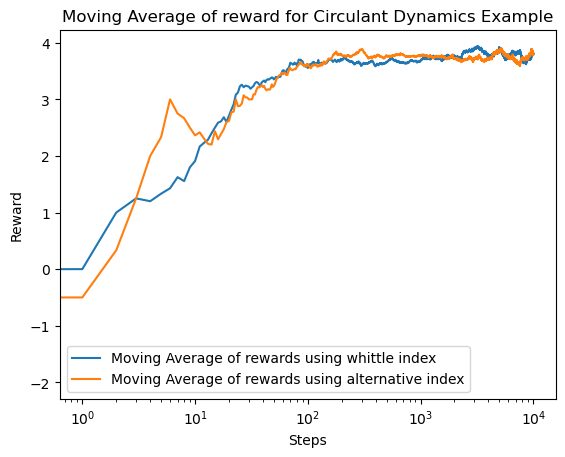

In [29]:
df_reward=pd.DataFrame()
df_reward['reward_whittle']=reward_sums_whittle_index
df_reward['reward_alternate']=reward_sums_alt_index
x=[i for i in range(10000)]
# plt.plot(df_reward['reward_whittle'].rolling(10,min_periods=1).mean(),label='Moving Average of rewards using whittle index')
# plt.plot(df_reward['reward_alternate'].rolling(10,min_periods=1).mean(),label='Moving Average of rewards using alternative index')
plt.semilogx(x,df_reward['reward_whittle'].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using whittle index')
plt.semilogx(x,df_reward['reward_alternate'].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using alternative index')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.title('Moving Average of reward for Circulant Dynamics Example')
